# Gaussian Likelihood and $\chi^{2}$

In [1]:
#import main libraries
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
%matplotlib inline

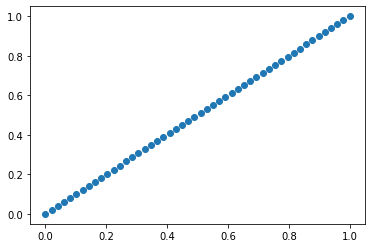

In [2]:
#Making a set of data and time
y = np.linspace(0,1,50)
t = np.linspace(0,1,50)

plt.plot(t,y, 'o')

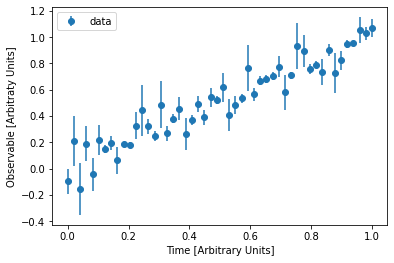

In [3]:
#Adding withe noise to data set
noise = np.random.normal(0, 0.1,50)
signal = y + noise

#Creating a line function
def line(t,p):
    a = p[0]
    b = p[1]
    return a + b*t

#Plotting with error bars
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# Gaussian Likelihood


$ L = P(D|M) = \left[ \prod_{i = 1}^{n} \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right]exp\left[ -\sum_{i =1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right] $

## Taking the natural log to the Gaussian Likelihood:


$ \ln(L) = \sum_{i = 1}^{n}  \ln \left[ \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right] - \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} $

$ ln(L) = \sum_{i=1}^{n} \left[ \ln \left( \frac{1}{\sqrt{2 \pi \sigma_{i}^{2}}} \right) - \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

## Then:

$ln(L) = \sum_{i=1}^{n}\left[ -\frac{1}{2} \ln\left( 2 \pi \sigma_{i}^{2} \right) - \frac{1}{2}\frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

## Then:

$ln(L) = -\frac{1}{2}\sum_{i=1}^{n} \left[ \ln \left( 2 \pi \sigma_{i}^{2} \right) + \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}} \right]$

In [14]:
#Defining a function for the logarithmic Gaussian likelihood
def negalolik(p,t,y,noise):
    f = line(t,p)
    chidos = (y - f)**2/noise**2
    lognorm = np.log(2 * np.pi * noise**2)
    total = lognorm + chidos
    loglike = -0.5*np.sum(total)
#Since we are trying to maximize the gaussian likelihood, we have to minimize its negative.     
    return -loglike

In [15]:
#Maximizing the likelihood.
lik_model = minimize(negalolik,x0=[0,0], args=(t,y,noise))

In [16]:
lik_model

      fun: -91.58755115781237
 hess_inv: array([[ 2.44906793e-05, -5.46020118e-05],
       [-5.46020118e-05,  1.98401147e-04]])
      jac: array([5.91278076e-04, 1.52587891e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 243
      nit: 3
     njev: 77
   status: 2
  success: False
        x: array([-5.07770938e-10,  9.99999995e-01])

In [17]:
print("The optimized values of our parameters are:","a =", lik_model.x[0],"and b =",lik_model.x[1])

The optimized values of our parameters are: a = -5.077709380540872e-10 and b = 0.9999999948971385


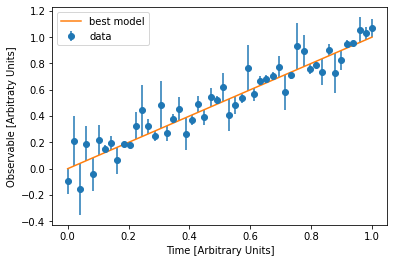

In [18]:
#Now plotting with those parameters
f = line(t,lik_model.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "best model")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()

# Now with $\chi^{2}$

## The mathematical expression for $\chi^{2}$ can be written as follows :

$ \chi_{2} = \sum_{i = 1}^{n} \frac{1}{2} \frac{(y_{i} - f_{i})^{2}}{\sigma_{i}^{2}}$

## Above's expression is very similar to the one of the Gaussian likelihood without the normalization term. This is because we can transform a Gaussian likelihood function into a $\chi_{2}$ if and only if the normalization term is constant.

In [19]:
#Defining a new line function
def linea(t,para):
    c = para[0]
    d = para[1]
    return c + d*t

#Defining a chi_square function
def jicuadro(para,t,y,noise):
    m = linea(t,para)
    chi = 0.5*(y - m)**2/noise**2
    chi_square = np.sum(chi)
    return chi_square

In [20]:
#Minimizing the chi_square
ji_cuadro = minimize(jicuadro,x0=[0,0],args=(t,y,noise))

In [21]:
print(ji_cuadro)

      fun: 1.7153812196063157e-13
 hess_inv: array([[ 2.45341740e-05, -5.51090859e-05],
       [-5.51090859e-05,  2.00392804e-04]])
      jac: array([6.98459134e-04, 3.50803751e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 176
      nit: 3
     njev: 55
   status: 2
  success: False
        x: array([1.07276908e-09, 9.99999993e-01])


In [22]:
print("The optimized values of our parameters are:","c =", ji_cuadro.x[0],"and d =",ji_cuadro.x[1])

The optimized values of our parameters are: c = 1.0727690817474085e-09 and d = 0.9999999928271079


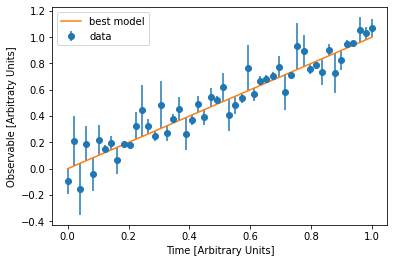

In [23]:
#Now plotting with those parameters
f = line(t,ji_cuadro.x)
plt.errorbar(t,signal, yerr = noise, label = "data", fmt = "o")
plt.plot(t,f, label = "best model")
plt.xlabel("Time [Arbitrary Units]")
plt.ylabel("Observable [Arbitraty Units]")
plt.legend()
plt.show()